# Reproduce figures found in the Cox and Gomez (2002) paper on an analytical expression for spiral arms

In [1]:
import numpy as np
from galpy.potential import SpiralArmsPotential, evaluateDensities, evaluatePotentials, MWPotential2014
import matplotlib.pyplot as plt
from astropy import units as u

//anaconda/envs/galpy/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



In [2]:
def make_figs_from_paper(plt_type='dens', arm_type='sin', add_mp=False, amp=10, N=2, alpha=15*u.deg, Rs=7*u.kpc,
                         r_ref=8*u.kpc, H=0.18*u.kpc):

    if arm_type == 'sin':
        Cs = [1]
    elif arm_type == 'con':
        Cs = [8./3./np.pi, 0.5, 8./15./np.pi]
       
    sp = SpiralArmsPotential(amp=amp, N=N, alpha=alpha, Rs=Rs, r_ref=r_ref, H=H, Cs=Cs)
    if add_mp:
        sp = [sp] + MWPotential2014
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')

    # Make data.
    Rn = np.linspace(3, 11) * u.kpc
    Zn = np.linspace(-1.5, 1.5) * u.kpc
    R, Z = np.meshgrid(Rn, Zn)

    data = np.empty((len(Rn), len(Zn)))

    for ii in range(len(R)):
        for jj in range(len(Z)):
            if plt_type == 'dens':
                data[ii, jj] = evaluateDensities(sp, Rn[ii], Zn[jj], 0)
            elif plt_type == 'pot':
                data[ii, jj] = evaluatePotentials(sp, Rn[ii], Zn[jj], 0)

    # Plot the surface.
    surf = ax.plot_surface(R, Z, data.T, cmap='coolwarm')

    # Customize axis.
    if plt_type == 'dens':
        ax.set_zlabel('Density', fontsize=18, labelpad=12)
    elif plt_type == 'pot':
            ax.set_zlabel('Potential', fontsize=18, labelpad=12)
    ax.set_xlabel('R (kpc)', fontsize=18, labelpad=10)
    ax.set_ylabel('z (kpc)', fontsize=18, labelpad=10)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()

## Fig. 1.—Comparison of modulation functions for sinusoidal and concentrated arms.

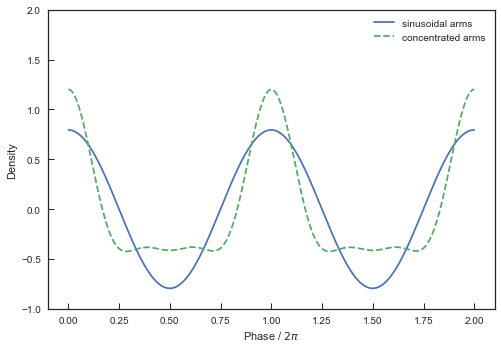

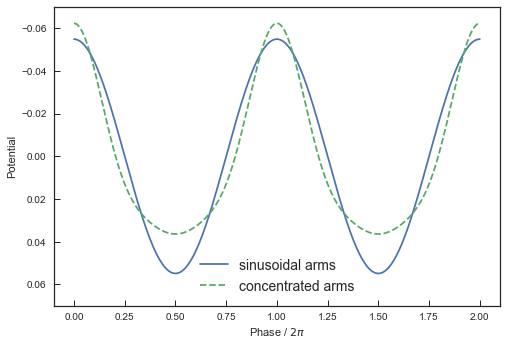

In [163]:
sp_sin = SpiralArmsPotential(amp=10, N=1, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc)
sp_con = SpiralArmsPotential(amp=10, N=1, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])

phi = np.linspace(0, 4*np.pi, 1000)
R, z = 8.*u.kpc, 0

dens_sin = np.empty(len(phi))
dens_con = np.empty(len(phi))
pots_sin = np.empty(len(phi))
pots_con = np.empty(len(phi))

for k in range(len(phi)):
    dens_sin[k] = sp_sin.dens(R, z, phi[k])
    dens_con[k] = sp_con.dens(R, z, phi[k])
    pots_sin[k] = sp_sin(R, z, phi[k])
    pots_con[k] = sp_con(R, z, phi[k])
   
plt.figure()
plt.plot(phi/2/np.pi, dens_sin, label='sinusoidal arms')
plt.plot(phi/2/np.pi, dens_con, label='concentrated arms', linestyle='--')
plt.ylim([-1, 2])
plt.ylabel('Density')
plt.xlabel('Phase / $2\pi$')
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(phi/2/np.pi, pots_sin, label='sinusoidal arms')
plt.plot(phi/2/np.pi, pots_con, label='concentrated arms', linestyle='--')
plt.ylim([-.07, .07])
plt.gca().invert_yaxis()
plt.ylabel('Potential')
plt.xlabel('Phase / $2\pi$')
plt.legend(fontsize=14)
plt.show()

## Fig. 2.—Gravitational potential for sinusoidal arms.

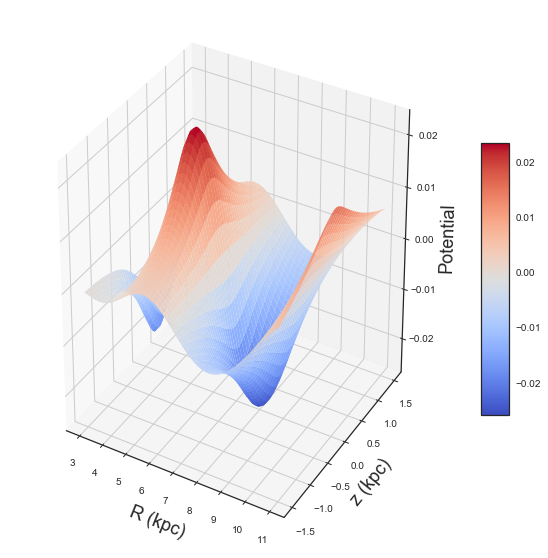

In [4]:
make_figs_from_paper(plt_type='pot')

Notes:
 * The potential scale for this potential is a hundred times smaller than the scale from the paper. (plot in paper potential goes from -2 to 2). The scale on the corresponding density plot does match the scale from the paper. Probably just the units they use?? I'm not sure how to input their density units with astropy.

## Fig. 3.—Distribution of density perturbation for sinusoidal arms. Corresponding potential is shown in Fig. 2.

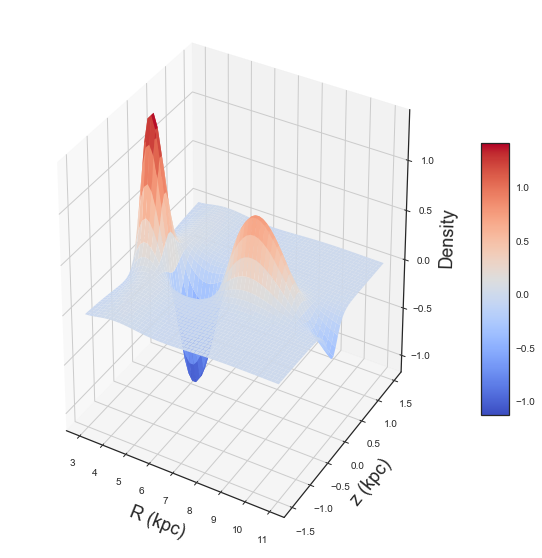

In [5]:
make_figs_from_paper()

Notes:
 * Using the same amplitude as Figure 2 (amp=10), the density scale seems to match the one in the paper. The potential does not. Again, just units??

## Fig. 4.—Gravitational potential for concentrated arms

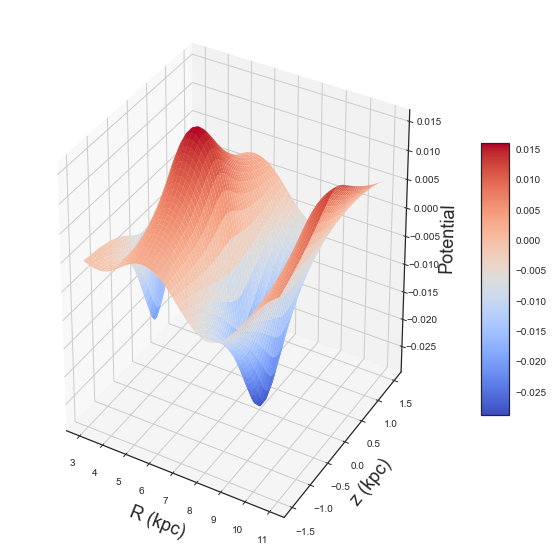

In [6]:
make_figs_from_paper(plt_type='pot', arm_type='con')

Notes:
 * Once again, potential axis scale is about a hundred times smaller than the paper.

## Fig. 5.—Distribution of density perturbation for concentrated arms. Corresponding potential is shown in Fig. 4.

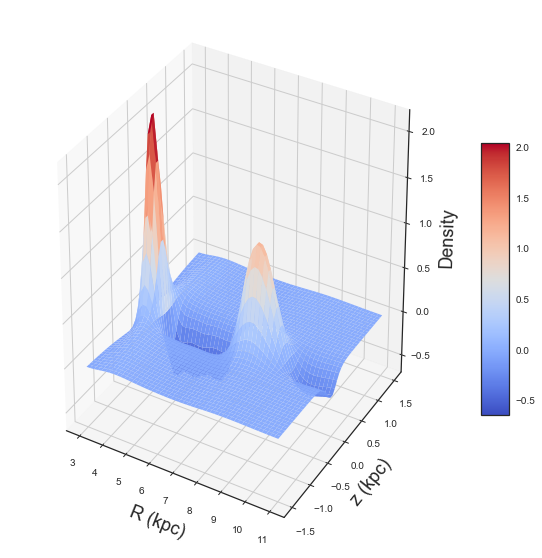

In [7]:
make_figs_from_paper(arm_type='con')

Notes:
 * Again, density scale matches the paper while the potential scale does not for the same amplitude.

## Fig. 6.—Midplane densities of the two cases, vs. radius

## AND Fig. 7.—Midplane potentials of the two cases, vs. radius

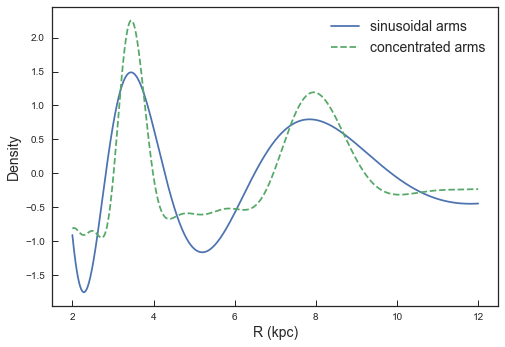

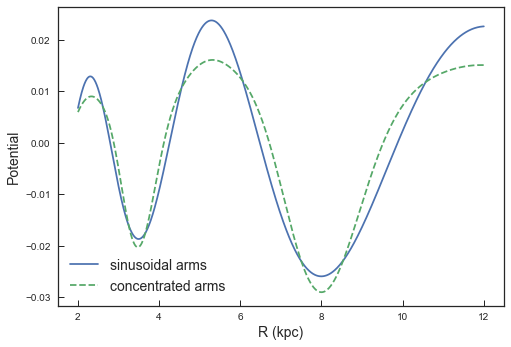

In [8]:
sp_sin = SpiralArmsPotential(amp=10, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc)
sp_con = SpiralArmsPotential(amp=10, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
R = np.linspace(2, 12, 1000) * u.kpc

dens_sin = np.empty(len(R))
dens_con = np.empty(len(R))
pots_sin = np.empty(len(R))
pots_con = np.empty(len(R))

phi, z = 0, 0
for k in range(len(R)):
    dens_sin[k] = sp_sin.dens(R[k], z, phi)
    dens_con[k] = sp_con.dens(R[k], z, phi)
    pots_sin[k] = sp_sin(R[k], z, phi)
    pots_con[k] = sp_con(R[k], z, phi)

plt.figure()
plt.plot(R, dens_sin, label='sinusoidal arms')
plt.plot(R, dens_con, label='concentrated arms', linestyle='--')
plt.xlabel('R (kpc)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=14)

plt.figure()
plt.plot(R, pots_sin, label='sinusoidal arms')
plt.plot(R, pots_con, label='concentrated arms', linestyle='--')
plt.gca().invert_yaxis()
plt.xlabel('R (kpc)', fontsize=14)
plt.ylabel('Potential', fontsize=14)
plt.gca().invert_yaxis()
plt.legend(fontsize=14)

plt.show()

## Fig. 8.—Densities of the two cases at r = 8 kpc, vs. height

## Fig. 9.—Potentials of the two cases at r = 8 kpc, vs. height


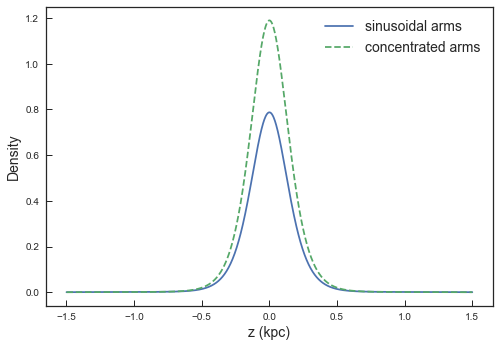

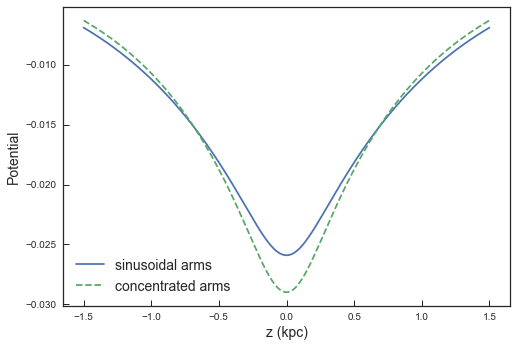

In [122]:
sp_sin = SpiralArmsPotential(amp=10, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc)
sp_con = SpiralArmsPotential(amp=10, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
z = np.linspace(-1.5, 1.5, 1000) * u.kpc

dens_sin = np.empty(len(z))
dens_con = np.empty(len(z))
pots_sin = np.empty(len(z))
pots_con = np.empty(len(z))

R, phi = 8*u.kpc, 0
for k in range(len(z)):
    dens_sin[k] = sp_sin.dens(R, z[k], phi)
    dens_con[k] = sp_con.dens(R, z[k], phi)
    pots_sin[k] = sp_sin(R, z[k], phi)
    pots_con[k] = sp_con(R, z[k], phi)

plt.figure()
plt.plot(z, dens_sin, label='sinusoidal arms')
plt.plot(z, dens_con, label='concentrated arms', linestyle='--')
plt.xlabel('z (kpc)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=14)

plt.figure()
plt.plot(z, pots_sin, label='sinusoidal arms')
plt.plot(z, pots_con, label='concentrated arms', linestyle='--')
plt.xlabel('z (kpc)', fontsize=14)
plt.ylabel('Potential', fontsize=14)
plt.legend(fontsize=14)

plt.show()

## Fig. 10.—Density distribution of concentrated arm perturbation plus net mass disk. See text for description of this intuitive distribution of the arm density, rather than the arm density perturbation, which has average density zero.

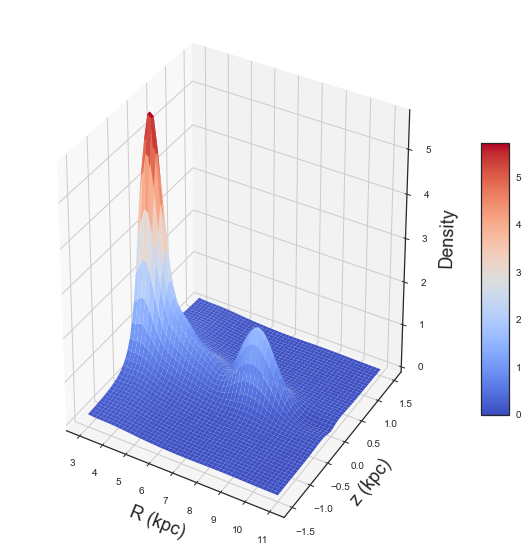

In [120]:
make_figs_from_paper(arm_type='con', add_mp=True, amp=10)

Notes:
 * Actually just used MWPotential2014, which drops off at a different rate than the net mass disk, but the same effect can be seen.

## Fig. 11.—Midplane arm density for the concentrated arm case. The domain is 22 kpc on a side. The rapidly oscillating density in the inner 3 kpc is not shown. Density includes net mass disk with the same scale height, radial drop-off rate, and total mass as the arms.

Notes:
 * Used MWPotential2014 instead of net mass disk with same scale height, etc.

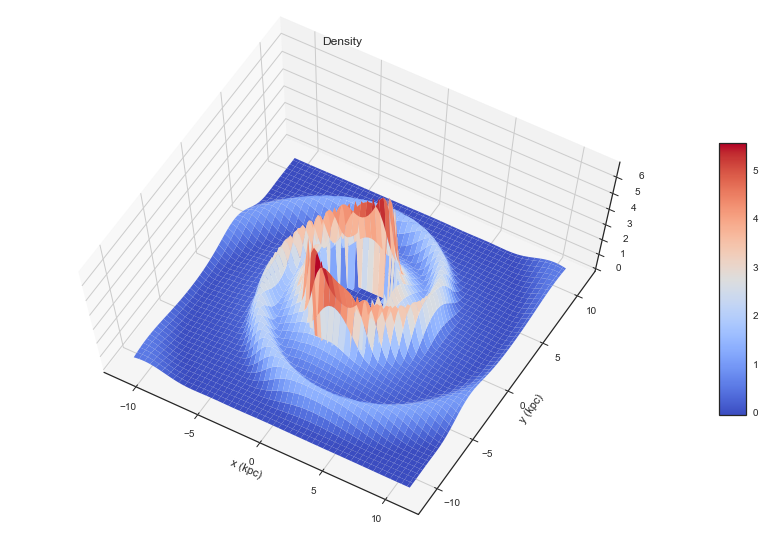

In [114]:
from galpy.util import bovy_coords
sp = SpiralArmsPotential(amp=10, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])
sp = [sp] + MWPotential2014

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

n = 100
xs = np.linspace(-11, 11, n) * u.kpc  # 22 kpc on each side
ys = np.linspace(-11, 11, n) * u.kpc
X, Y = np.meshgrid(xs, ys)
den_xy = np.zeros((n, n))

for ii in range(n):
    for jj in range(n):
        R, phi, z = bovy_coords.rect_to_cyl(xs[ii].value, ys[jj].value, 0)
        R = R * u.kpc
        den_xy[ii, jj] = evaluateDensities(sp, R, z, phi)

den_xy[np.where(np.sqrt(X**2 + Y**2) < 3*u.kpc)] = 0 # exclude inner 3 kpc

surf = ax.plot_surface(X, Y, den_xy, cmap='coolwarm')
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.title('Density')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(elev=70.)

plt.show()

## Fig. 12.—Midplane density of disk + arms for various arm amplitudes, sinusoidal arm case. The legend shows the fractional amplitude relative to the unperturbed disk at a radius of 8 kpc.

## Fig. 13.—Midplane density vs. radius of disk + arms for various arm amplitudes, concentrated arm case.

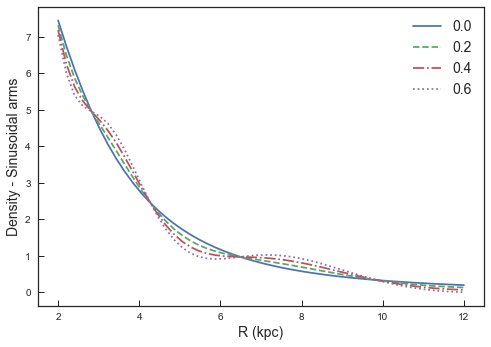

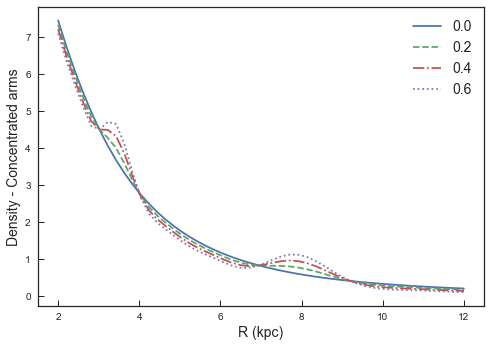

In [150]:
R = np.linspace(2, 12) * u.kpc
z, phi = 0, 0

sp_sin = SpiralArmsPotential(amp=1, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc)
sp_con = SpiralArmsPotential(amp=1, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])

sp_sin_dens = 0.
sp_con_dens = 0.

phi_sin = 0.
phi_con = 0.
for p in np.linspace(0, np.pi): 
    if sp_sin_dens < sp_sin.dens(8*u.kpc, 0, p):
        sp_sin_dens = sp_sin.dens(8*u.kpc, 0, p)
        phi_sin = p
        
    if sp_con_dens < sp_con.dens(8*u.kpc, 0, p):
        sp_con_dens = sp_con.dens(8*u.kpc, 0, p)
        phi_con = p
        
mp_dens = evaluateDensities(MWPotential2014, 8*u.kpc, 0)
r_sin = mp_dens / sp_sin_dens
r_con = mp_dens / sp_con_dens * 1.5

linestyles = ['-', '--', '-.', ':']

a = 0
for rel_amp in [0., 0.2, 0.4, 0.6]:
    sp_sin = [SpiralArmsPotential(amp=rel_amp*r_sin, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc)] \
                + MWPotential2014
    sp_con = [SpiralArmsPotential(amp=rel_amp*r_con, N=2, alpha=15*u.deg, Rs=7*u.kpc, r_ref=8*u.kpc, H=0.18*u.kpc, Cs=[8./3./np.pi, 0.5, 8./15./np.pi])] \
                + MWPotential2014
    
    dens_sin = np.empty(len(R))
    dens_con = np.empty(len(R))

    phi, z = 0, 0
    for k in range(len(R)):
        dens_sin[k] = evaluateDensities(sp_sin, R[k], 0, phi_sin)
        dens_con[k] = evaluateDensities(sp_con, R[k], 0, phi_con)

    plt.figure(1)
    plt.plot(R, dens_sin, label='{:.1f}'.format(rel_amp), linestyle=linestyles[a])

    plt.figure(2)
    plt.plot(R, dens_con, label='{:.1f}'.format(rel_amp), linestyle=linestyles[a])
    a = a + 1
    
plt.figure(1)
plt.xlabel('R (kpc)', fontsize=14)
plt.ylabel('Density - Sinusoidal arms', fontsize=14)
plt.legend(fontsize=14)

plt.figure(2)
plt.xlabel('R (kpc)', fontsize=14)
plt.ylabel('Density - Concentrated arms', fontsize=14)
plt.legend(fontsize=14)

plt.show()

Notes:
 * Slightly different than the paper. Probably because of the disk.

## Fig. 14.—Density distribution of disk plus arms for 0.57 amplitude, sinusoidal arm case.

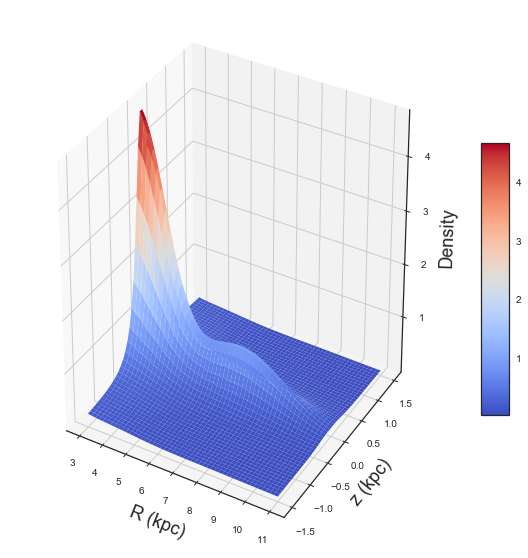

In [158]:
make_figs_from_paper(arm_type='sin', add_mp=True, amp=0.57*r_sin)

Notes:
 * As always, I just used MWPotential2014, not whatever disk they used.

## Fig. 15.—Figure shows the full density represented by Model 2 of Dehnen & Binney (1998) plus a sinusoidal arm perturbation with our standard parameters (see x 4) with an amplitude at 8 kpc of 57% of the thin disk density. This is the two-armed spiral model used by Gomez & Cox (2002) to explore the gaseous response in MHD. Note that the arm/interarm contrast is small even at this amplitude.

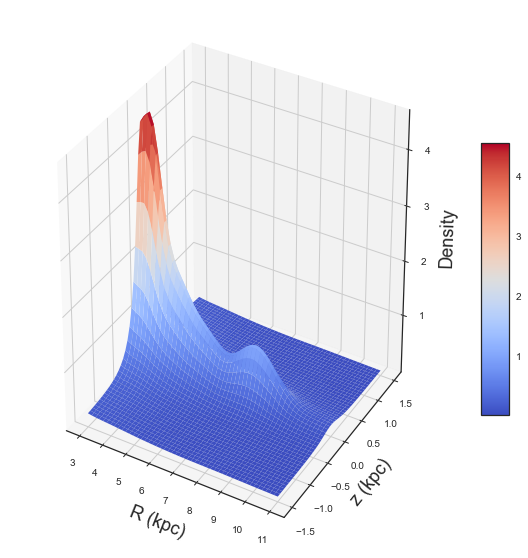

In [159]:
make_figs_from_paper(arm_type='con', add_mp=True, amp=0.57*r_con)

Notes:
 * No it doesn't. I don't know what they did here, so the following plot is actually the same as the figure above, but with concentrated arms.